## Number of arrests in Pittsburgh

Less arrests means that the nighborhood is more likey to be safer than a neighborhood with more arrests, so we decided to see how many arrests happened in each neighborhood.

In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline

So first we import the arrest data

In [2]:
data = pd.read_csv("arrests.csv")
data

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54526,2046502,22040092,34.0,M,B,2022-03-18T11:24:00,"N Homewood AV & Frankstown AV Pittsburgh, PA 1...",903 Criminal Conspiracy. / 907 Possessing Inst...,"N Homewood AV & Frankstown AV Pittsburgh, PA 1...",Homewood North,5,1302.0,9.0,2.0,-79.896301,40.457405
54527,2046503,22040258,30.0,M,W,2022-03-18T17:20:00,"8500 Block Frankstown AV Pittsburgh, PA 15221",9501 Bench Warrant,"8500 Block Frankstown AV Pittsburgh, PA 15221",East Hills,5,1306.0,9.0,2.0,-79.875427,40.458106
54528,2046504,22024352,22.0,M,B,2022-03-10T10:00:00,"600 Block 1st AV Pittsburgh, PA 15219",13(a)(16) Possession of Controlled Substance /...,"4300 Block Coleridge ST Pittsburgh, PA 15201",Stanton Heights,5,1005.0,9.0,2.0,-79.941903,40.477560
54529,2046505,22031051,48.0,M,W,2022-03-16T01:48:00,"1500 Block Alverado ST Pittsburgh, PA 15216",2718(a)(1) Strangulation - Applying Pressure t...,"1500 Block Alverado ST Pittsburgh, PA 15216",Brookline,6,1918.0,NaN,NaN,0.000000,0.000000


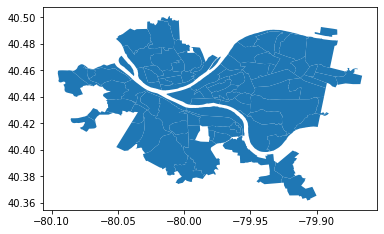

In [3]:
map = geopandas.read_file("Neighborhoods_.shp")
map.plot()

In [4]:
rates = pd.value_counts(data.INCIDENTNEIGHBORHOOD).reset_index()
rates.columns = ['Neighborhood', 'Arrests']
rates

,Neighborhood,Arrests
0,Central Business District,3315
1,South Side Flats,2843
2,Carrick,1960
3,East Allegheny,1773
4,Homewood South,1744
...,...,...
93,Regent Square,28
94,Central Northside,23
95,Mt. Oliver Boro,18
96,Troy Hill-Herrs Island,6


Here we show all the neighborhoods and the number of arrests as a bar graph.

Text(0, 0.5, 'Amount')

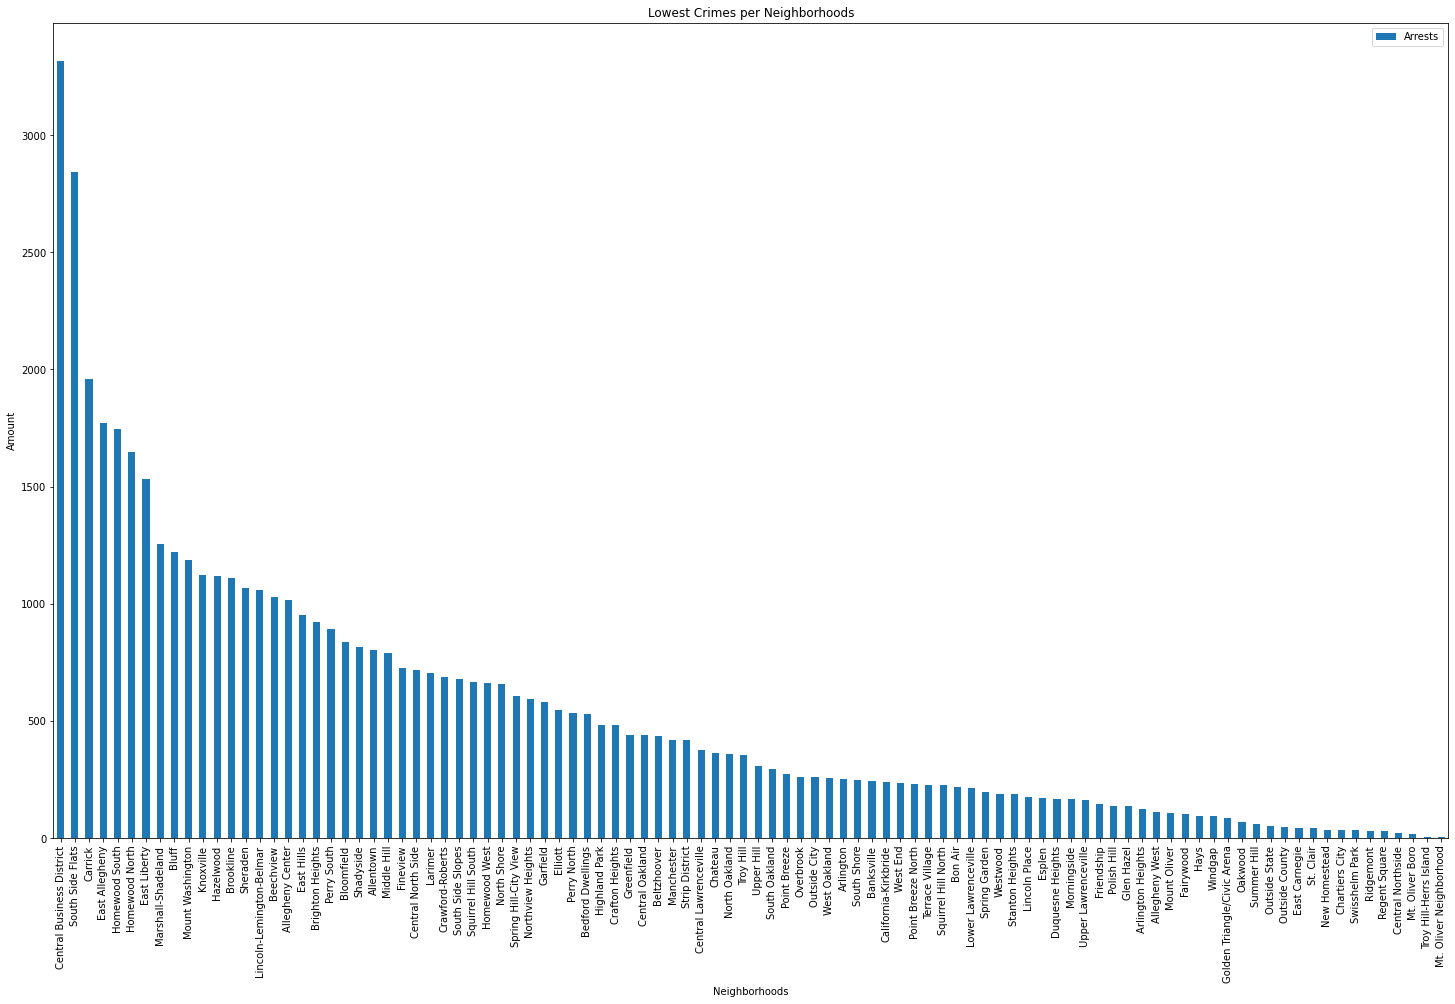

In [5]:
rates.plot(kind="bar", figsize=(25,15), x="Neighborhood", y="Arrests")
plt.title("Lowest Crimes per Neighborhoods")
plt.xlabel("Neighborhoods")
plt.ylabel("Amount")

We merge the data from arrests and map based on neighborhood names.

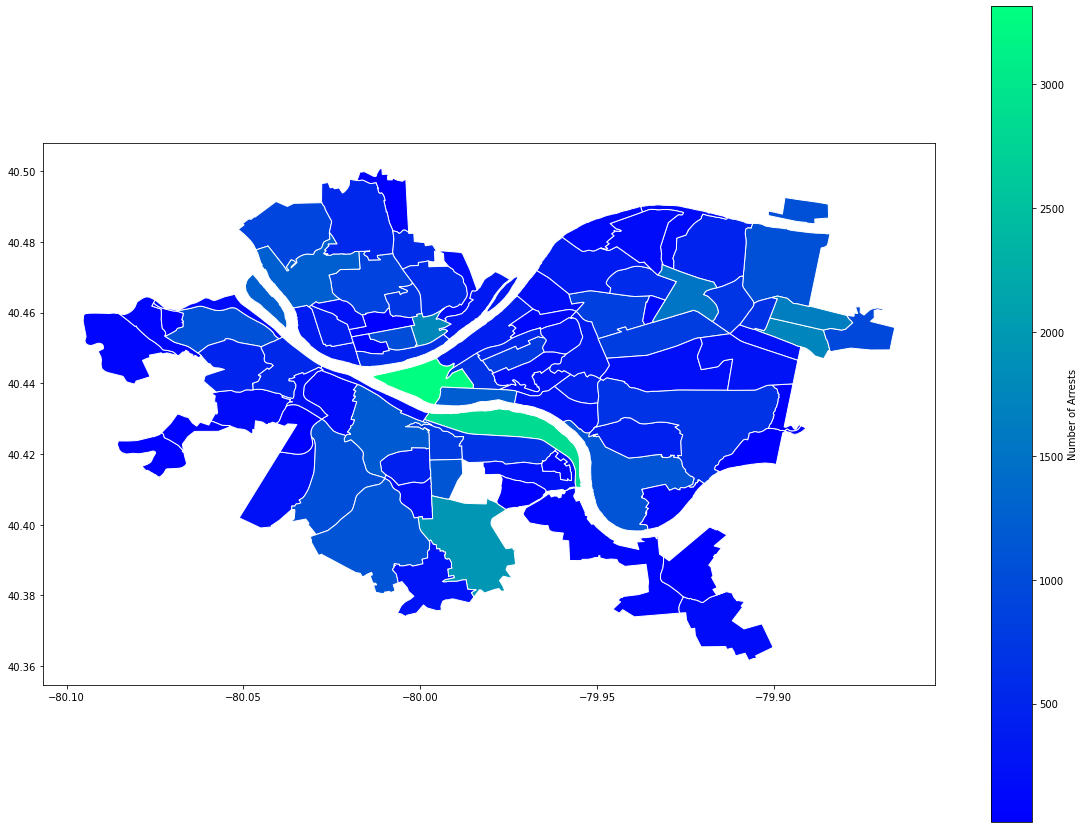

In [6]:
arrestsMap = map.merge(rates, how = 'left', left_on = 'hood', right_on = 'Neighborhood')
arrestsMap.head(10)
arrestsMap.plot(column='Arrests',
              cmap='winter',
              edgecolor='white',
              legend=True,
              legend_kwds={'label':'Number of Arrests'},
              figsize=(20, 15),
              missing_kwds={'color': 'white'}
              )

So in terms of safety, Mt. Oliver is the best with Central Business District being the worst.